# Задание 3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split, StratifiedKFold
import sklearn.linear_model

import sklearn.metrics as m

from scipy.stats import norm

**[1]** Используя make_blobs с любым random_state,
сгенерировать датасет df, в котором есть три класса с размером каждого класса
100, четыре количественных (недискретных) признака, а центры классов
зафиксированы в следующих точках: Класс 0 – (+1, +1, +1, +1), Класс 1 – (-1,-1,-1,-1), Класс 2 – (-1,+1,-1,+1).

In [2]:
# https://stackoverflow.com/questions/60620728/is-it-possible-to-define-the-coordinates-of-centers-with-make-blobs

# Генерация данных
data_feat, data_target = make_blobs(
    n_samples=300,
    n_features=4,
    centers=[
        (1, 1, 1, 1),
        (-1, -1, -1, -1),
        (-1, 1, -1, 1)
    ],
    # cluster_std=0.5,
    random_state=999
)

# Преобразуем в датафрейм
df = pd.DataFrame()

df['target'] = data_target

for feat_no in range(data_feat.shape[1]):
    feat_name = 'feat' + str(feat_no+1)
    df[feat_name] = data_feat[:, feat_no]

# print(data_feat)
# print(data_target)
display(df)

,target,feat1,feat2,feat3,feat4
0,0,1.480261,-0.085252,1.212498,0.752955
1,1,0.841362,-1.256809,1.037685,-1.039988
2,1,-4.132512,-2.167407,-1.434173,-0.533113
3,0,-0.467899,2.234151,-0.140957,-1.842636
4,0,0.411680,-0.055859,-0.888382,1.762585
...,...,...,...,...,...
295,0,1.002204,0.126690,2.342036,0.267580
296,0,2.747775,3.130055,1.071154,-0.841642
297,2,-1.333608,0.435607,-0.604358,2.801817
298,1,-1.364627,-0.168394,-1.831206,0.076220


**[2]** Не забываем повторять шаги с задания 1
- ключевые характеристики датасета
- корреляции
- визуализация на всех парах var

In [3]:
print(f'1. Размерность датасета: {df.shape}')

print('\n2. Признаки:')
[print(f'{f}') for f in df.columns.to_list()]
print(f'Итого: {df.columns.shape[0]}')

print('\n3. Целевые классы:')
[print(f'{q} — {df.loc[df.target == q].shape[0]} объектов') for q in df.target.unique()]
print(f'Итого: {df.target.unique().shape[0]}')

print('\n4. Объектов с неопределёнными признками:')
isnull_count = 0
for o in range(df.shape[0]):
    if (df.iloc[o].isnull().sum()) > 0:
        isnull_count += 1
print(f'{(isnull_count / df.shape[0]) * 100} % ({isnull_count})')

print('\n5. Средние и медианные значения каждого параметра:')
df_avg = pd.DataFrame(df.mean()).transpose().drop(columns=['target'])
df_med = pd.DataFrame(df.median()).transpose().drop(columns=['target'])
display(df_avg, df_med)

1. Размерность датасета: (300, 5)

2. Признаки:
target
feat1
feat2
feat3
feat4
Итого: 5

3. Целевые классы:
0 — 100 объектов
1 — 100 объектов
2 — 100 объектов
Итого: 3

4. Объектов с неопределёнными признками:
0.0 % (0)

5. Средние и медианные значения каждого параметра:


,feat1,feat2,feat3,feat4
0,-0.376698,0.283794,-0.35371,0.388493


,feat1,feat2,feat3,feat4
0,-0.390748,0.368272,-0.469641,0.491368


In [4]:
dataset_pearson = (df.drop(columns=['target'])).corr(method='pearson')

print('Коэф. корреляции Пирсона между признаками:')
display(dataset_pearson)

Коэф. корреляции Пирсона между признаками:


,feat1,feat2,feat3,feat4
feat1,1.000000,0.224860,0.469398,0.169327
feat2,0.224860,1.000000,0.259334,0.435813
feat3,0.469398,0.259334,1.000000,0.176538
feat4,0.169327,0.435813,0.176538,1.000000


In [5]:
data_feat_names = df.drop(columns=['target']).columns
data_target_names = np.unique(data_target)
print('Список признаков датасета:', data_feat_names.to_list())
print('Список классов датасета:', data_target_names)

Список признаков датасета: ['feat1', 'feat2', 'feat3', 'feat4']
Список классов датасета: [0 1 2]


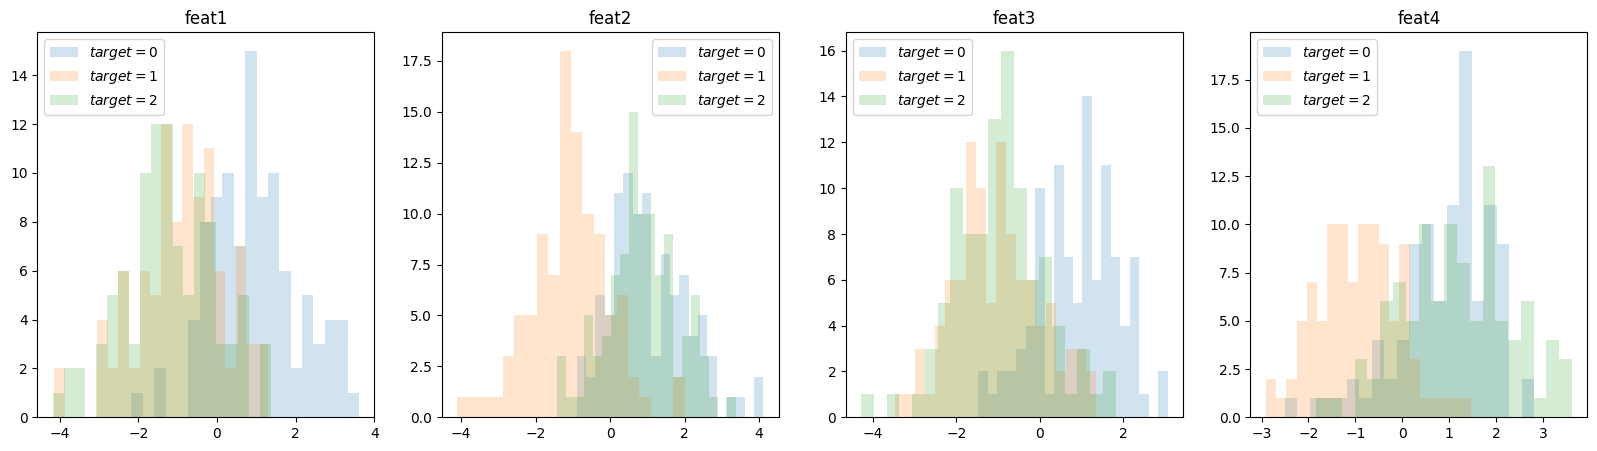

In [6]:
# Гистограммы с одной и той же парой переменных

subplot_count = 1
plt.figure(figsize=(20, 5))

for f in data_feat_names:
    plt.subplot(1, len(data_feat_names), subplot_count)
    plt.title(f)
    subplot_count += 1

    for c in data_target_names:
        data_c = df[df['target'] == c]
        plt.hist(data_c[f], bins=20, alpha=0.2, label=f'$target = {c}$')
        plt.legend()

plt.show()

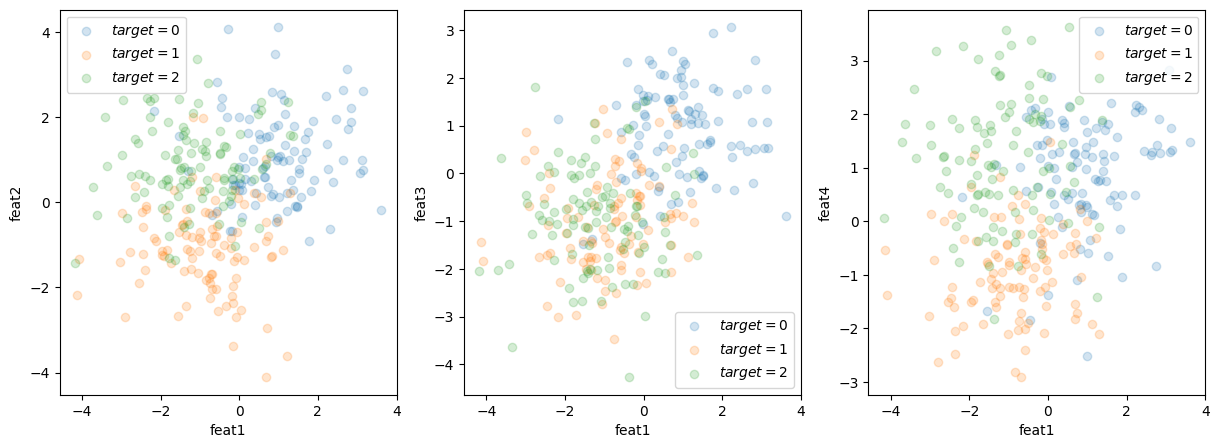

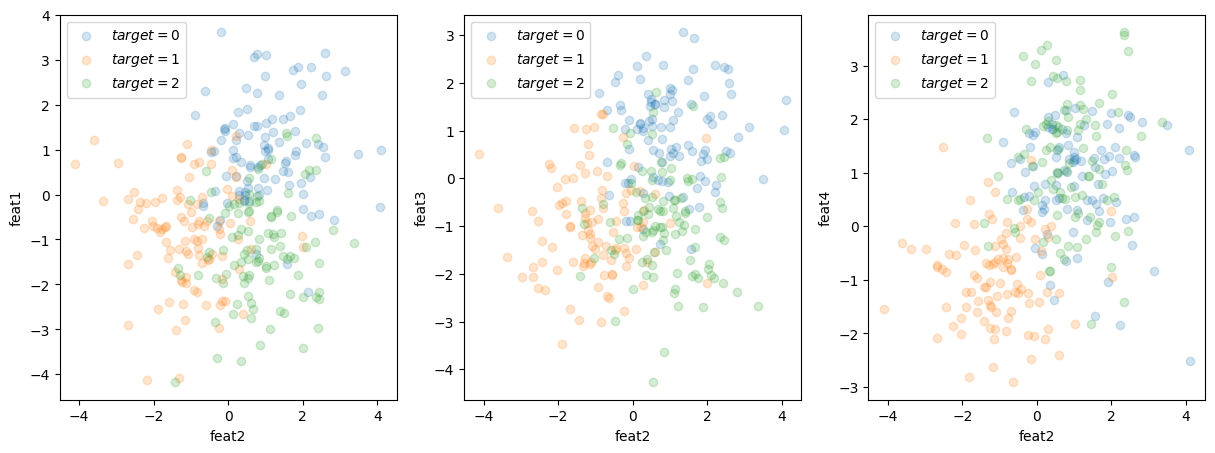

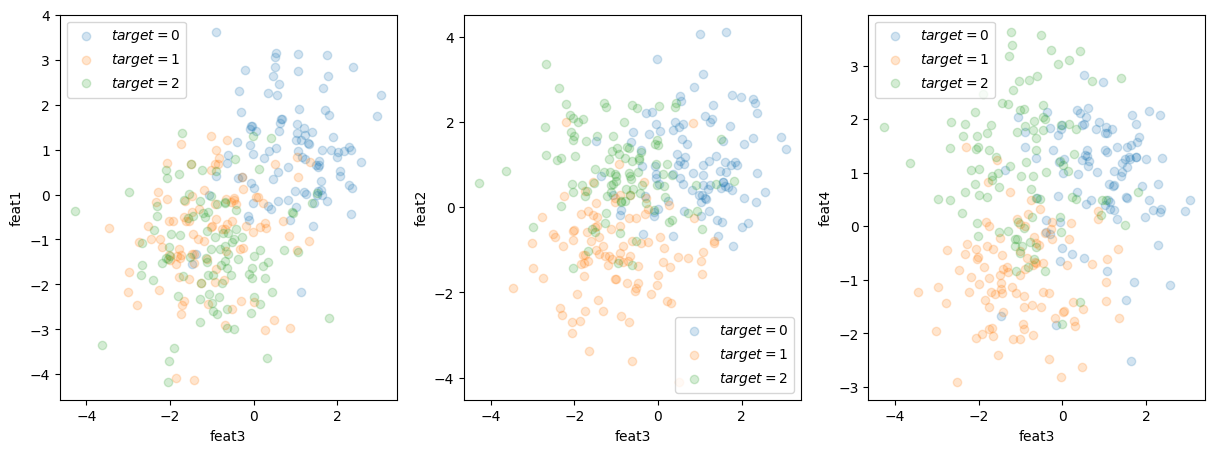

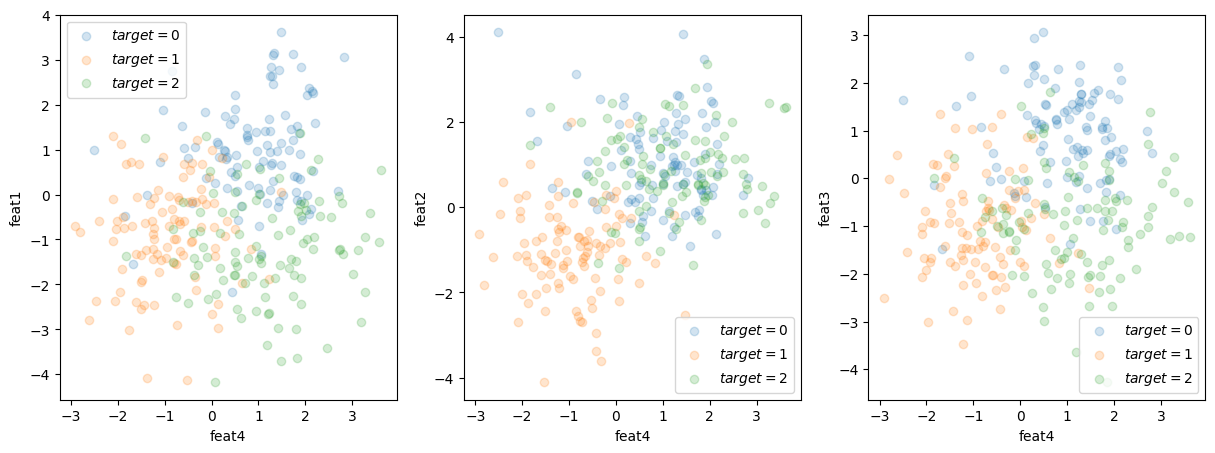

In [7]:
# Графики с разными парами переменных

for f1 in data_feat_names:
    subplot_count = 1
    plt.figure(figsize=(20, 5))

    for f2 in data_feat_names:
        if f1 != f2:
            plt.subplot(1, len(data_feat_names), subplot_count)
            plt.xlabel(f1)
            plt.ylabel(f2)
            subplot_count += 1

            for c in data_target_names:
                subset = df[df['target'] == c]
                plt.scatter(subset[f1], subset[f2], alpha=0.2, label=f'$target = {c}$')
                plt.legend()

    plt.show()

**[3]** На основе созданного в пункте [1] датасета сгенерировать отдельные
дополнительные датасеты (df_A_B), в которых к классу 0 добавлено A одинаковых
точек с координатами (+B,-B,+B,-B), где A = 1, 10, 100 и B = 5, 10, 20, при этом
количество объектов в остальных классах неизменно.

In [8]:
data_target0 = df[df['target'] == 0]
obj = data_target0.iloc[0]
print(obj)

target    0.000000
feat1     1.480261
feat2    -0.085252
feat3     1.212498
feat4     0.752955
Name: 0, dtype: float64


In [9]:
# В питоне нет аналога enum() из JS, поэтому сделаем список новых датасетов
# и далее будем работать уже с ним, вызывая нужный датасет из словаря...

df_A_B = dict()

for A in [1, 10, 100]:
    for B in [5, 10, 20]:
        dfname = f'{A}_{B}'

        new_sample = pd.DataFrame([{
            'target': 0.0,
            'feat1': float(B),
            'feat2': float(-B),
            'feat3': float(B),
            'feat4': float(-B)
        }])#.transpose()
        # print(new_sample)

        df_A_B[dfname] = pd.concat([df] + [new_sample]*A, ignore_index=True)

print(df_A_B['1_5'])

df_names = list(df_A_B.keys())
print(df_names)

     target     feat1     feat2     feat3     feat4
0       0.0  1.480261 -0.085252  1.212498  0.752955
1       1.0  0.841362 -1.256809  1.037685 -1.039988
2       1.0 -4.132512 -2.167407 -1.434173 -0.533113
3       0.0 -0.467899  2.234151 -0.140957 -1.842636
4       0.0  0.411680 -0.055859 -0.888382  1.762585
..      ...       ...       ...       ...       ...
296     0.0  2.747775  3.130055  1.071154 -0.841642
297     2.0 -1.333608  0.435607 -0.604358  2.801817
298     1.0 -1.364627 -0.168394 -1.831206  0.076220
299     0.0  0.101834  1.054027  1.612752  1.255061
300     0.0  5.000000 -5.000000  5.000000 -5.000000

[301 rows x 5 columns]
['1_5', '1_10', '1_20', '10_5', '10_10', '10_20', '100_5', '100_10', '100_20']


**[4]** Выбрать пару классов (включая класс с повторенными объектами) и один количественный признак.

Для каждого из датасетов df и df_A_B в своем пространстве Х-Y (количественный признак-класс) построить и визуализировать объекты, линию линейной регрессии и линию логистической регрессии. Регрессии строить на паре Х-Y (количественный признак-класс).

Оценить качество работы полученных на основе логистической регрессии классификаторов, используя ROC кривые, восстановив на графике ROC кривых точку классификации Sensitivity-Specificity и доверительные интервалы CI95 бутстрепом (n=1000).

Все полученные графики возможно расположить в две колонки: левая колонка – визуализация пространства и регрессий, правая – графики с ROC кривой и точкой. 

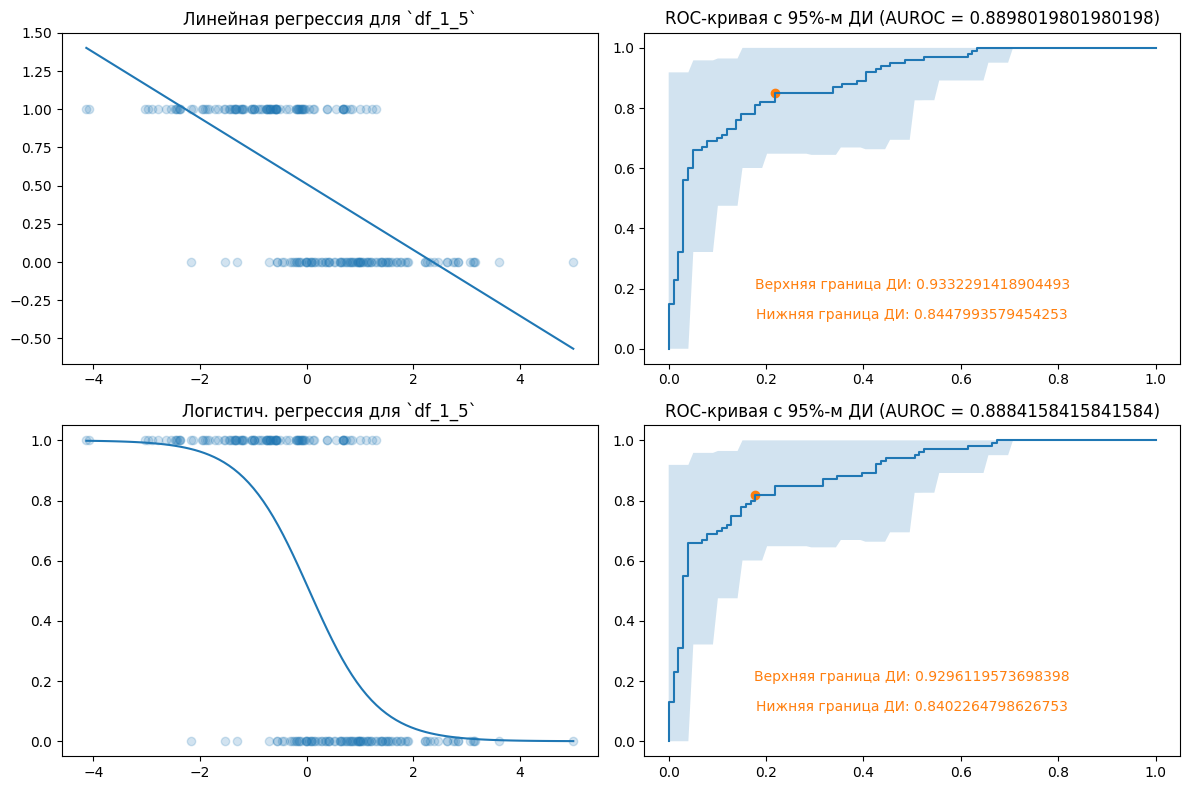

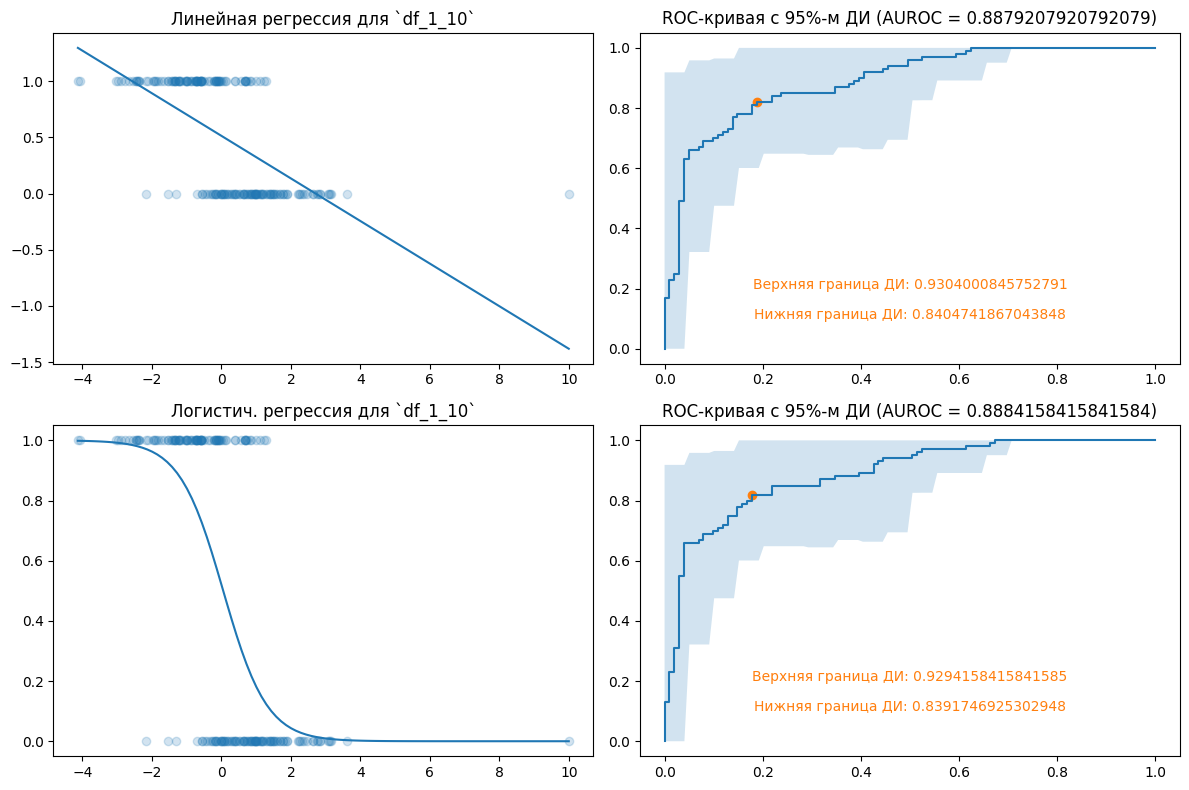

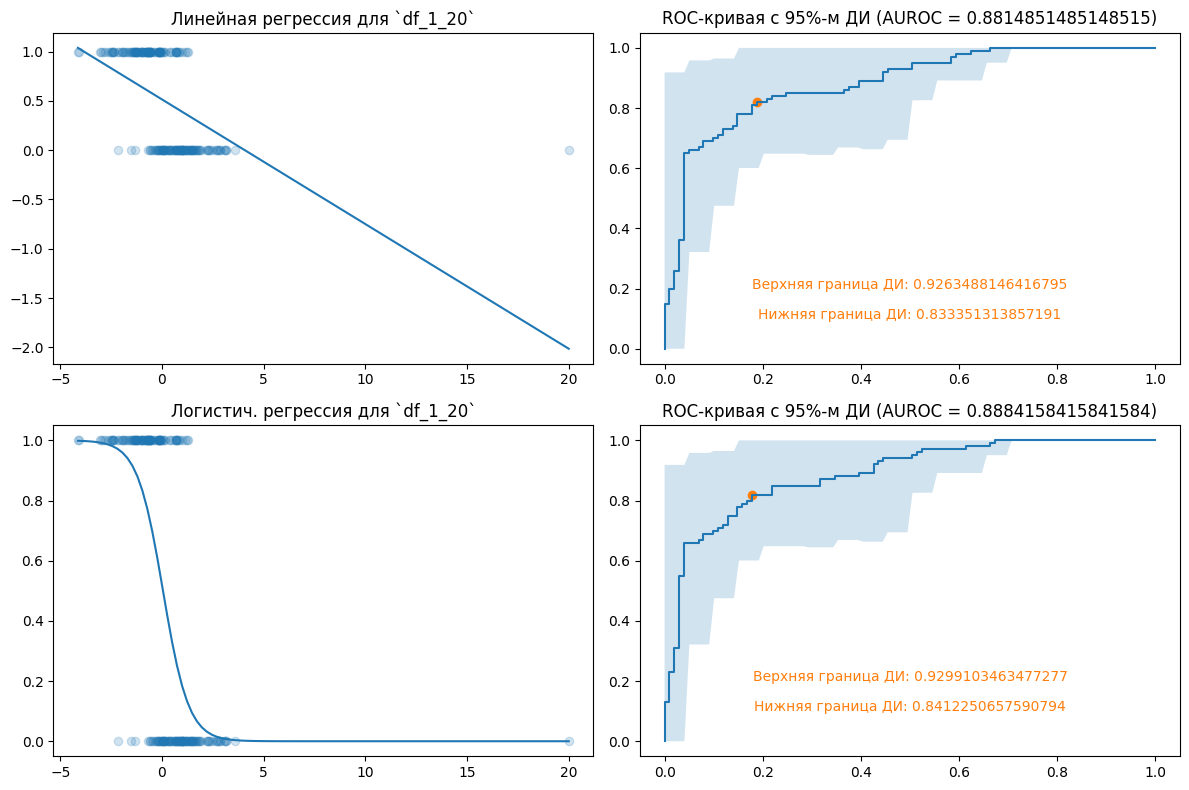

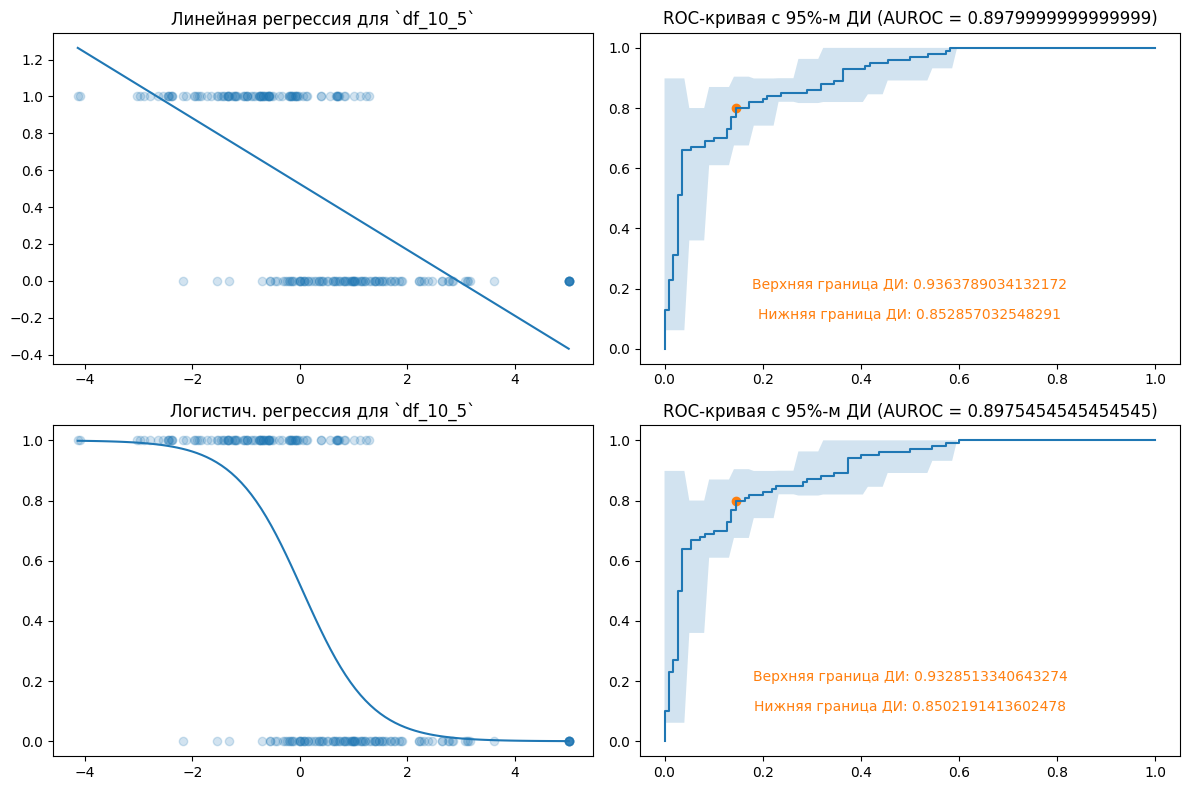

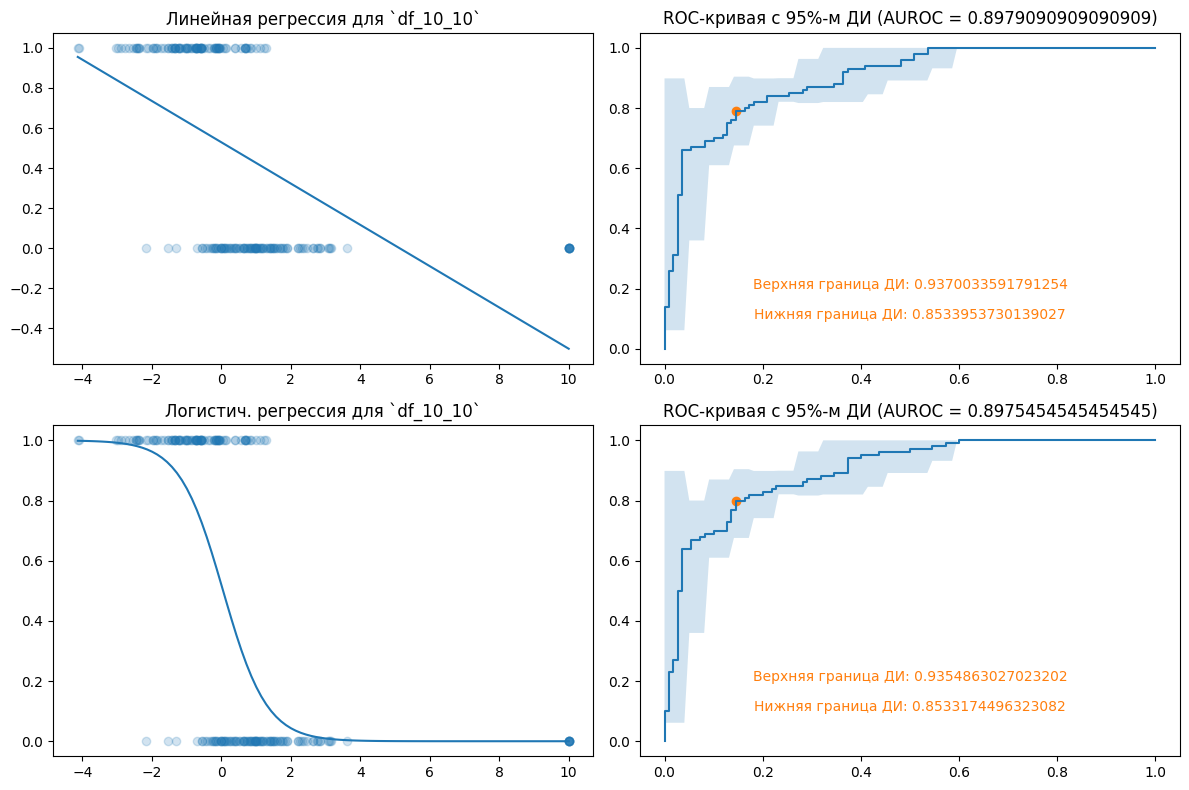

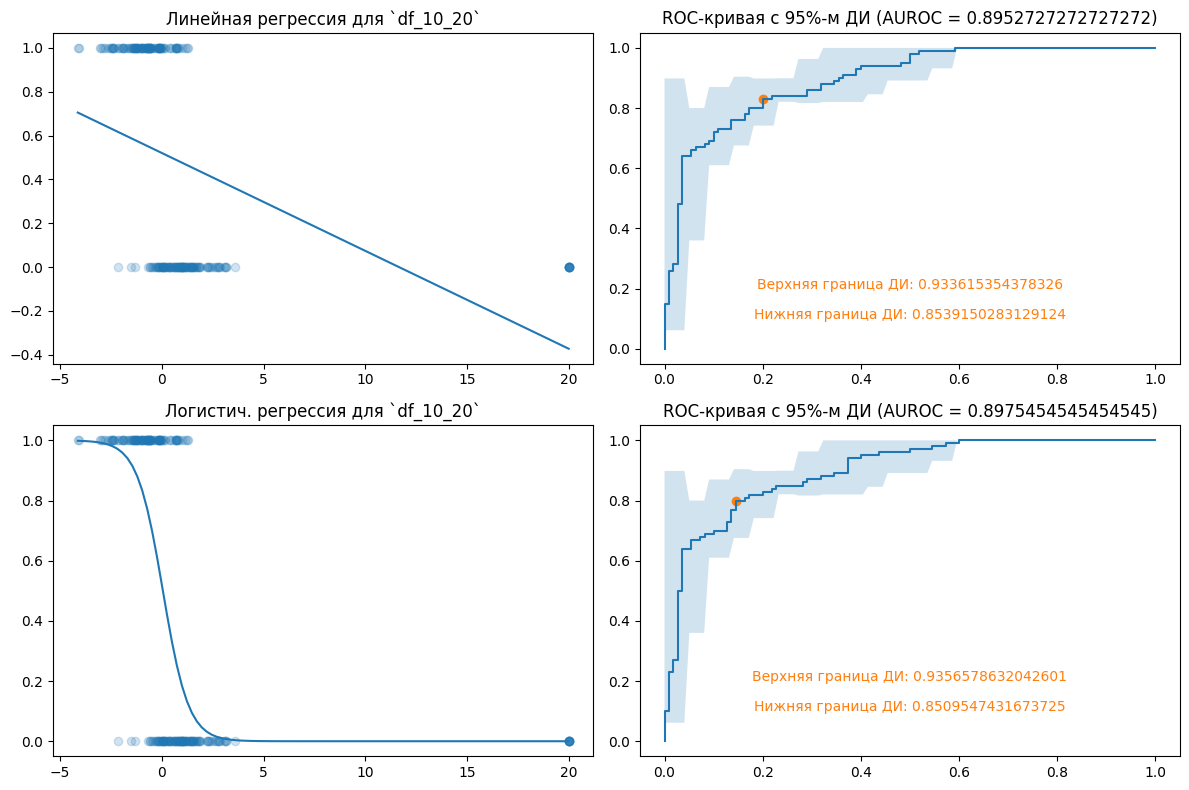

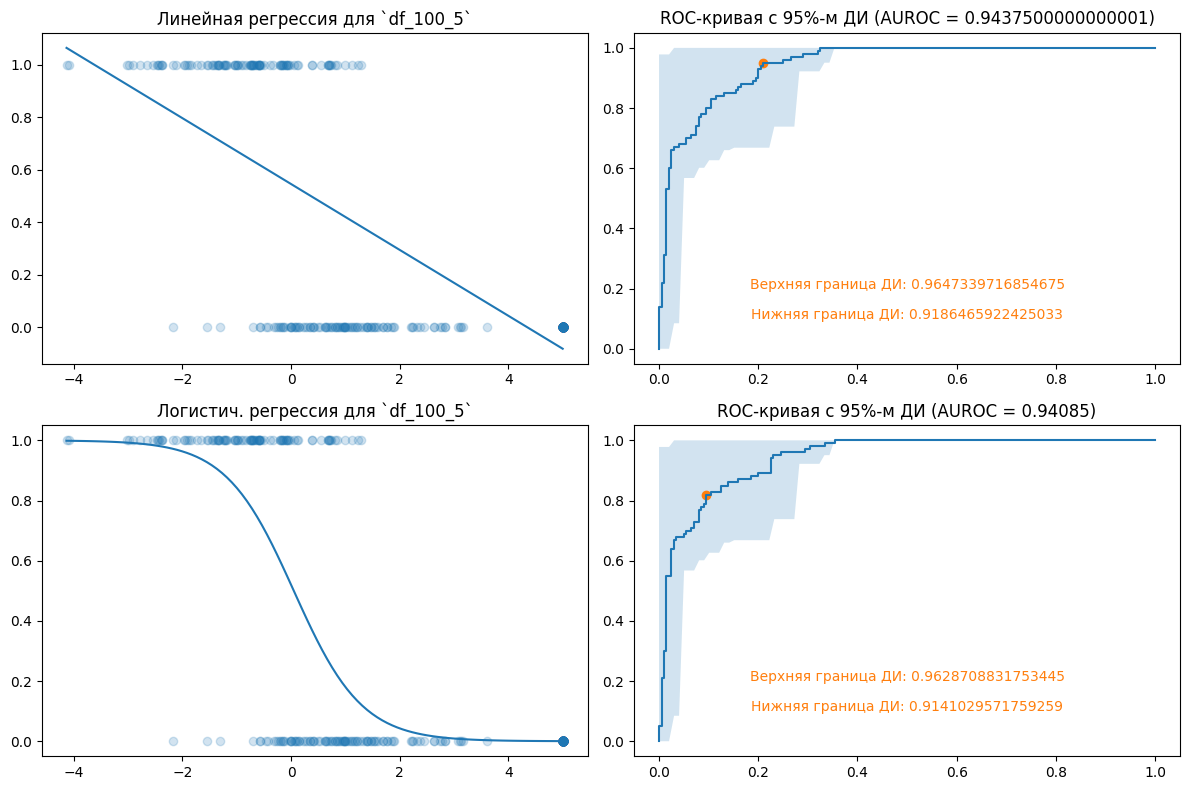

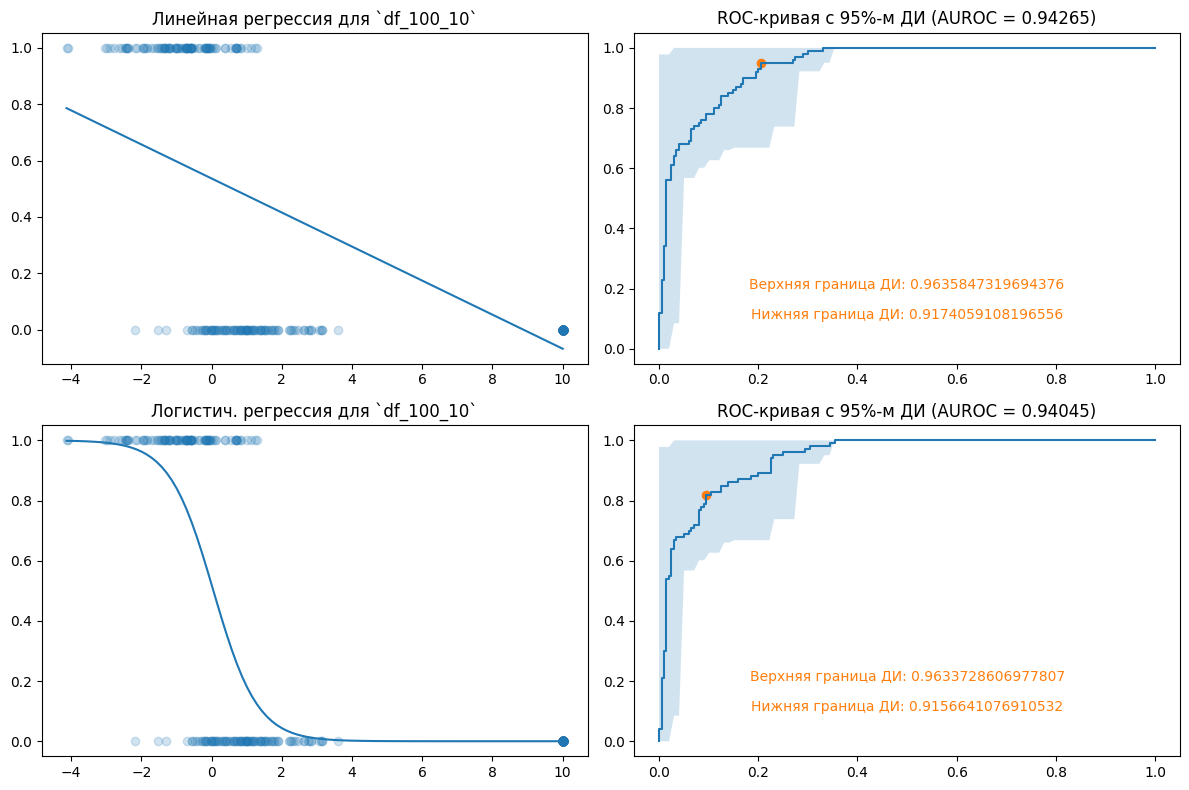

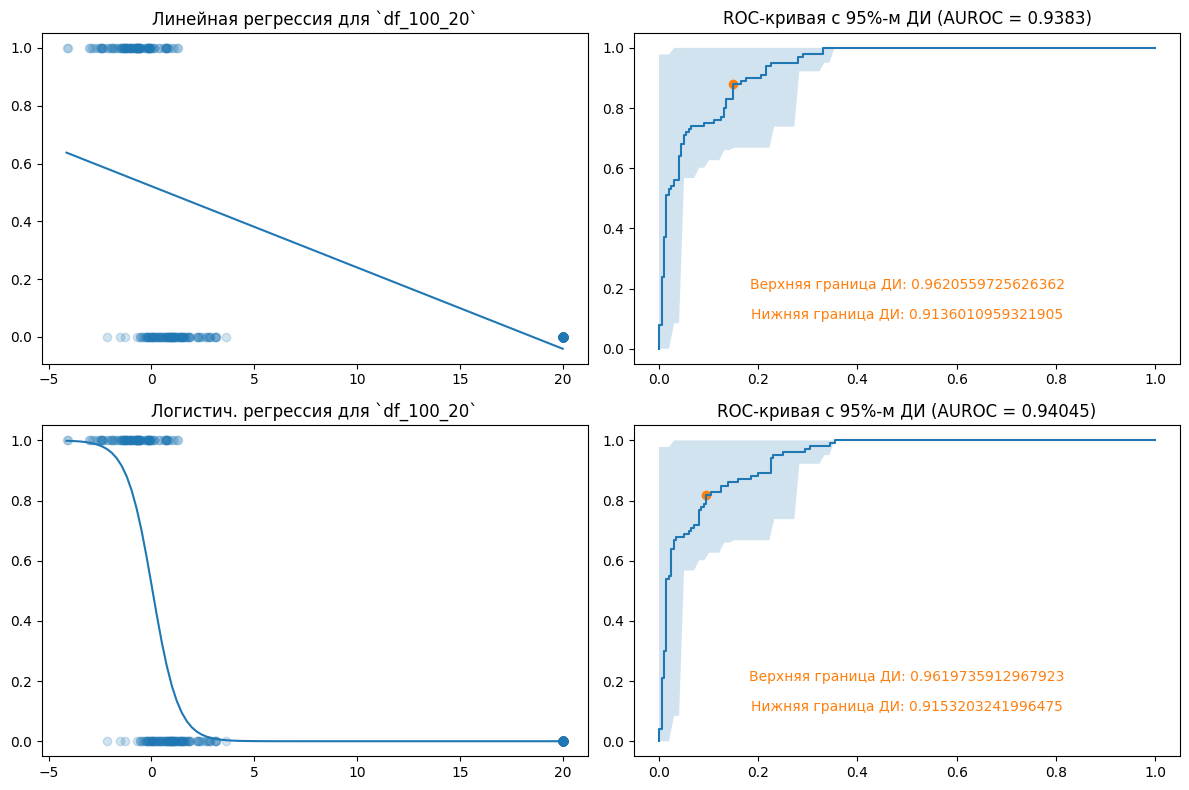

In [144]:
IC_95 = norm.ppf(1 - ((1 - 0.95) / 2)) # <-- Дов. интервал 95% (https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf)

for df_name in df_names:
    data = df_A_B[df_name][df_A_B[df_name]['target'].isin([0, 1])]

    # Выберем признак и класс, который будет определять по этому признаку
    feat = data[['feat1']].values
    target_class = (data['target'].values == 1).astype(int)


    models = [sklearn.linear_model.LinearRegression(), sklearn.linear_model.LogisticRegression()]
    plt.figure(figsize=(12, 8))

    for idx, model in enumerate(models):
        # Выполняем обучение регрессий и подбираем границы графиков
        model.fit(feat, target_class)

        border_x = np.linspace(feat.min(), feat.max(), 100).reshape(-1, 1)

        plt.subplot(2, 2, idx*2+1)

        try:
            pred_line = model.predict_proba(border_x)[:, 1]
            plt.title(f'Логистич. регрессия для `df_{df_name}`')
        except:
            pred_line = model.predict(border_x)
            plt.title(f'Линейная регрессия для `df_{df_name}`')

        plt.scatter(feat, target_class, alpha=0.2)
        plt.plot(border_x, pred_line)


        # Средняя ROC-кривая и AUROC для доверительного интервала
        SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

        target_class_real, target_class_proba, roc_tpr_array = [], [], []

        for train_idx, test_idx in SKF.split(feat, target_class):
            model.fit(feat[train_idx], target_class[train_idx])
            try:
                result = model.predict_proba(feat[test_idx])[:, 1]
            except:
                result = model.predict(feat[test_idx])

            fpr, tpr, _ = m.roc_curve(target_class[test_idx], result)

            roc_tpr_array.append(np.interp(np.linspace(0, 1, 100), fpr, tpr))
            target_class_real.append(target_class[test_idx])
            target_class_proba.append(result)

        target_class_real, target_class_proba = np.concatenate(target_class_real), np.concatenate(target_class_proba)
        fpr, tpr, _ = m.roc_curve(target_class_real, target_class_proba)
        roc_auc = m.auc(fpr, tpr)

        plt.subplot(2, 2, idx*2+2)
        plt.title(f"ROC-кривая с 95%-м ДИ (AUROC = {roc_auc})")

        mean_tpr, std_tpr = np.mean(roc_tpr_array, axis=0), np.std(roc_tpr_array, axis=0)

        plt.fill_between(
            np.linspace(0, 1, 100),
            np.maximum(0, mean_tpr - (IC_95 * std_tpr)),
            np.minimum(1, mean_tpr + (IC_95 * std_tpr)),
            alpha=0.2
        )
        plt.plot(fpr, tpr)


        # Бутстреп доверительного интервала
        bootstrapped_scores = [
            m.auc(fpr_boot, tpr_boot)
            for indices in [np.random.randint(0, len(target_class_proba), len(target_class_proba)) for _ in range(1000)]
            if len(np.unique(target_class_real[indices])) > 1
            for fpr_boot, tpr_boot, _ in [m.roc_curve(target_class_real[indices], target_class_proba[indices])]
        ]

        ci_lower = np.percentile(bootstrapped_scores, (100-95)/2)
        ci_upper = np.percentile(bootstrapped_scores, 100-(100-95)/2)

        plt.text(0.5, 0.1, f'Нижняя граница ДИ: {ci_lower}', ha='center', color='C1')
        plt.text(0.5, 0.2, f'Верхняя граница ДИ: {ci_upper}', ha='center', color='C1')


        # Точка оптимального результата между Sensitivity и Specificity
        plt.scatter([fpr[np.argmax(tpr - fpr)]], [tpr[np.argmax(tpr - fpr)]])

    plt.tight_layout()
    plt.show()

<!-- # **AAAAAAAAAAAAAAAAAAAAAAa CERF CERF CERF CERF** -->

**[5]** Для выбранной пары классов (включая класс с повторенными объектами) на всех признаках вычислить уравнение множественной линейной регрессии, где Y – класс, Xi – признаки. Используя полученные уравнения множественной линейной регрессии, на основе каждого из датасетов df и df_A_B сформировать новые датасеты logdf и logdf_A_B, в каждом из которых есть только один признак Х, сформированный на основе соответствующего уравнения множественной линейной регрессии, а переменная Y – отнесение к классу.

# осталось совсем чучут!! в 6 задании можно просто скопипастить код из 4, а в 5 и 7 изи (см. ячейки 17, 18 в референс-файле) ^_^

**[9]** Для датасета 10k на основе 3-fold, 5-fold, 10-fold, 20-fold, 50-fold, 100-fold кросс-
валидации построить кривые AUROC и AUPRC c доверительными интервалами
(CI95). Вместо CI95 можно взять CI90, CI80 или другой вариант доверительного
интервала.

***Для `df10k` вычисление будеи невероятно долгим, поэтому ниже идут визуализации для `df100` (заняло 49 мин). Я могу вычислить, если важно, именно для 10k, в коде ниже это потребует замены ровно двух символов.***

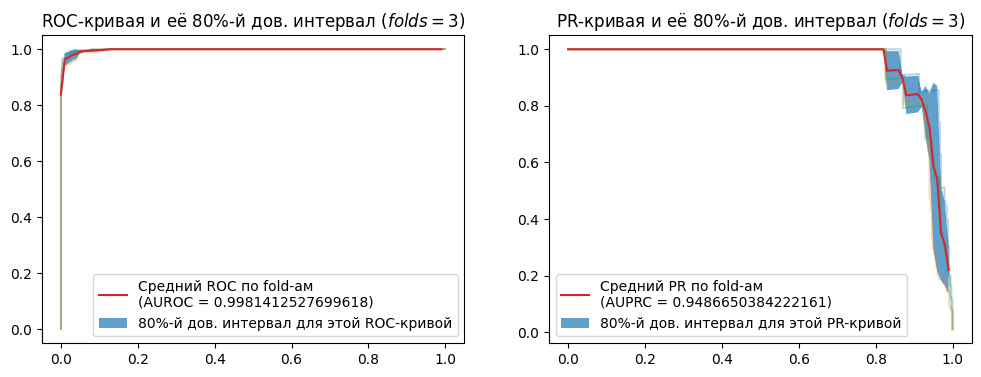

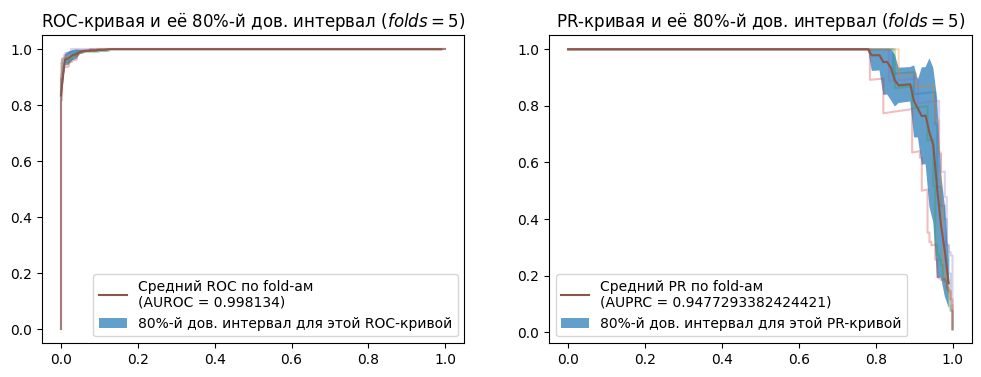

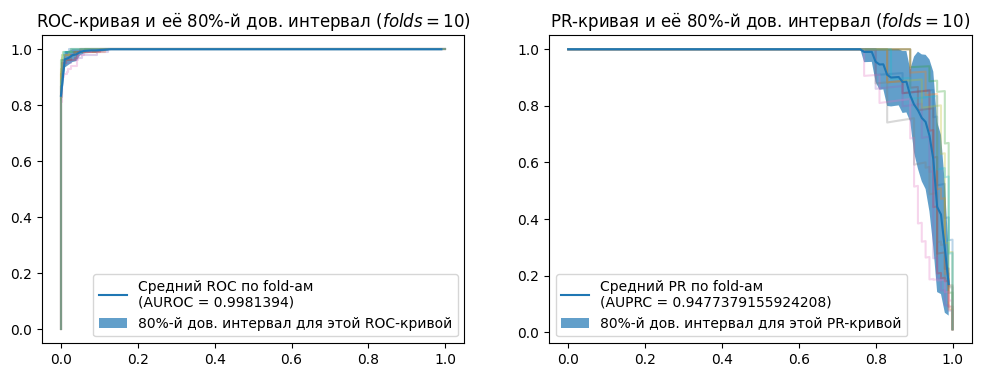

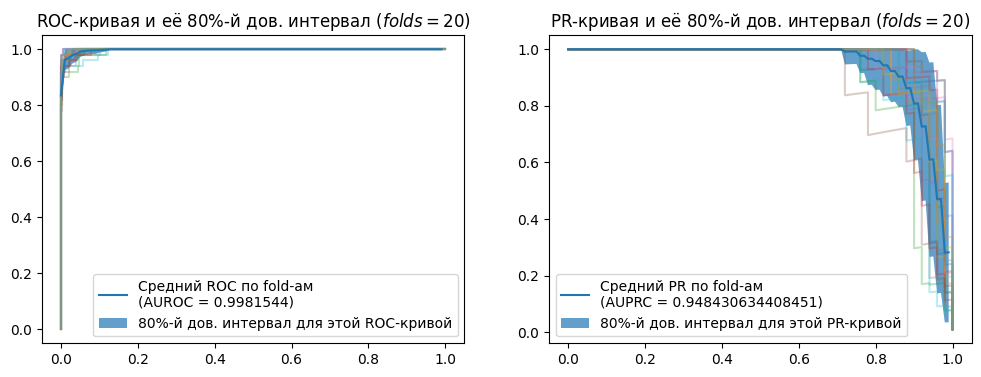

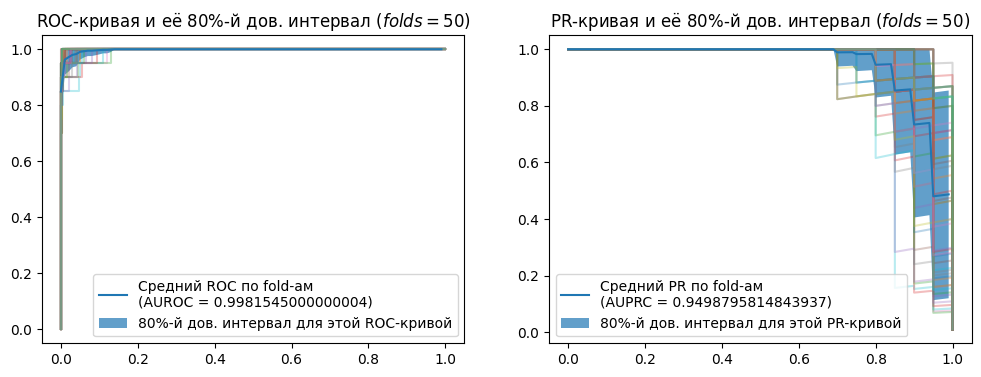

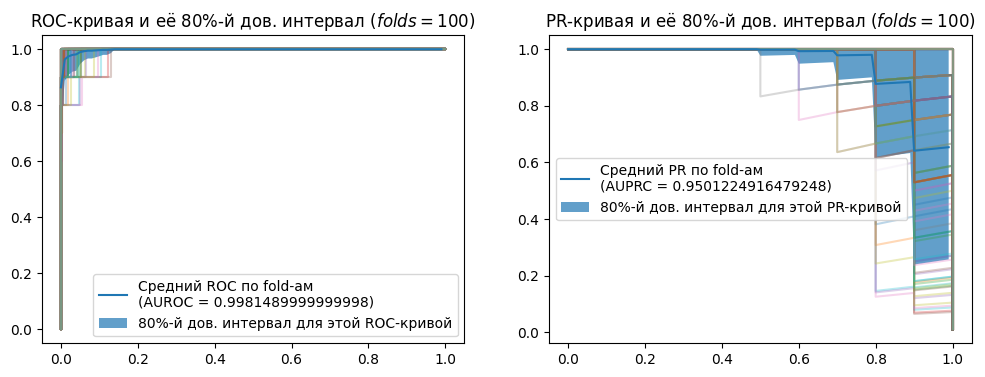

In [ ]:
df_data = df100[df100['target'].isin([0, 1])]
df_feat = df_data[['feat1', 'feat4']]
df_target = df_data['target']

svm = SVC(kernel='linear', probability=True)

folds_list = [3, 5, 10, 20, 50, 100]

IC_80 = norm.ppf(1 - ((1 - 0.8) / 2)) # <-- Дов. интервал 80% (https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf)


for folds in folds_list:
    SKF = StratifiedKFold(n_splits=folds, shuffle=True, random_state=80085)

    plt.figure(figsize=(12, 4))


    # Здесь и далее -- вычисления и виз-ия для ROC-кривой
    plt.subplot(1, 2, 1)

    ROC_FPR_fixed = np.arange(0, 1, 0.01) # Выступает в качестве лин. оси от 0 до 1
    ROC_curves = []
    AUROC_mean = 0

    # Расчёты для каждого фолда из списка
    for i, (train_idx, test_idx) in enumerate(SKF.split(df_feat, df_target)):
        svm.fit(df_feat.iloc[train_idx], df_target.iloc[train_idx])
        svm_pred = svm.predict_proba(df_feat.iloc[test_idx])[:, 1]

        FPR, TPR, _ = m.roc_curve(df_target.iloc[test_idx], svm_pred)
        ROC_curves.append(np.interp(ROC_FPR_fixed, FPR, TPR)) # Интерполяция (можно без неё, если принципиально)
        AUROC_mean += m.auc(FPR, TPR)

        plt.plot(FPR, TPR, alpha=0.3)

    AUROC_mean /= folds
    ROC_curves = np.asarray(ROC_curves)

    # Находим среднюю и ст. отклонение, по ним строим дов. интервал
    ROC_TPR_mean = np.mean(ROC_curves, axis=0)
    ROC_TPR_std = np.std(ROC_curves, axis=0)
    # ROC_FPR_fixed[0], ROC_TPR_mean[0] = 0, 0 # Для красоты, чтобы график средней ROC доходил до (0, 0)

    plt.plot(
        ROC_FPR_fixed, ROC_TPR_mean, 
        label=f'Средний ROC по fold-ам\n(AUROC = {AUROC_mean})',
    )

    plt.fill_between(
        ROC_FPR_fixed, 
        np.maximum(0, ROC_TPR_mean - (IC_80 * ROC_TPR_std)), 
        np.minimum(1, ROC_TPR_mean + (IC_80 * ROC_TPR_std)), 
        alpha=0.7, label='80%-й дов. интервал для этой ROC-кривой'
    )
    plt.title(f'ROC-кривая и её 80%-й дов. интервал ($folds = {folds}$)')
    plt.legend()


    # Здесь и далее -- вычисления и виз-ия для PR-кривой
    plt.subplot(1, 2, 2)

    PR_R_fixed = np.arange(0, 1, 0.01) # Выступает в качестве лин. оси от 0 до 1
    PR_curves = []
    AUPRC_mean = 0

    # Расчёты для каждого фолда из списка
    for i, (train_idx, test_idx) in enumerate(SKF.split(df_feat, df_target)):
        svm.fit(df_feat.iloc[train_idx], df_target.iloc[train_idx])
        svm_pred = svm.predict_proba(df_feat.iloc[test_idx])[:, 1]

        P, R, _ = m.precision_recall_curve(df_target.iloc[test_idx], svm_pred)
        PR_curves.append(np.interp(PR_R_fixed, R[::-1], P[::-1])) # Интерполяция (можно без неё, если принципиально)
        AUPRC_mean += m.auc(R, P)

        plt.plot(R, P, alpha=0.3)

    AUPRC_mean /= folds
    PR_curves = np.asarray(PR_curves)

    # Находим среднюю и ст. отклонение, по ним строим дов. интервал
    PR_P_mean = np.mean(PR_curves, axis=0)
    PR_P_std = np.std(PR_curves, axis=0)
    # PR_R_fixed[0], PR_P_mean[-1] = 0, 0 # Для красоты, чтобы график средней PR доходил до (1, 0)

    plt.plot(
        PR_R_fixed, PR_P_mean, 
        label=f'Средний PR по fold-ам\n(AUPRC = {AUPRC_mean})',
    )

    plt.fill_between(
        PR_R_fixed, 
        np.maximum(0, PR_P_mean - (IC_80 * PR_P_std)),
        np.minimum(1, PR_P_mean + (IC_80 * PR_P_std)),
        alpha=0.7, label='80%-й дов. интервал для этой PR-кривой'
    )
    plt.title(f'PR-кривая и её 80%-й дов. интервал ($folds = {folds}$)')
    plt.legend()


    plt.show()

---

**Версия от 24-10-26 (WORK IN PROGRESS!)**